In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon, MultiPolygon
import shapefile as shp
import plotly.express as px

In [66]:

zipcodes_csv = pd.read_csv('output-data/schools_rated-per-zipcode.csv')
cleaned_zipcode_df = zipcodes_csv[['name','zip','type','level-codes','lat','lon','lat_lon','new rating']].copy()
cleaned_zipcode_df['zip'] = cleaned_zipcode_df['zip'].fillna(0).astype(int)
cleaned_zipcode_df.head(-6)

,name,zip,type,level-codes,lat,lon,lat_lon,new rating
0,Graduation Achievement Center Charter High School,30303,charter,h,33.760502,-84.387169,"(33.760502, -84.387169)",NaN
1,Wellspring Living,30303,public,"m,h",33.754742,-84.385574,"(33.754742, -84.385574)",NaN
2,The Life School of Atlanta,30303,private,h,33.749504,-84.392090,"(33.749504, -84.39209)",B-
3,K12 International Academy,30334,private,"e,m,h",33.749733,-84.385696,"(33.749733, -84.385696)",C+
4,The Keystone School,30334,private,"m,h",33.749733,-84.385696,"(33.749733, -84.385696)",A+
...,...,...,...,...,...,...,...,...
156,NaN,0,NaN,NaN,NaN,NaN,NaN,B+
157,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
158,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
159,NaN,0,NaN,NaN,NaN,NaN,NaN,C+


In [70]:
#cleaned_zipcode_df['zip'].describe()
cleaned_zipcode_df[~(cleaned_zipcode_df == 0).all(axis=1)]
cleaned_zipcode_df = cleaned_zipcode_df.loc[~((cleaned_zipcode_df['zip'] == 0))]
cleaned_zipcode_df = cleaned_zipcode_df.dropna(subset=['new rating'])

#cleaned_zipcode_df = cleaned_zipcode_df.loc[~((cleaned_zipcode_df['new rating'] == None))]

cleaned_zipcode_df.head()


,name,zip,type,level-codes,lat,lon,lat_lon,new rating
2,The Life School of Atlanta,30303,private,h,33.749504,-84.392090,"(33.749504, -84.39209)",B-
3,K12 International Academy,30334,private,"e,m,h",33.749733,-84.385696,"(33.749733, -84.385696)",C+
4,The Keystone School,30334,private,"m,h",33.749733,-84.385696,"(33.749733, -84.385696)",A+
7,Cristo Rey Atlanta Jesuit High School,30308,private,h,33.760597,-84.382477,"(33.760597, -84.382477)",A-
8,KIPP Atlanta Collegiate,30314,charter,h,33.756157,-84.451271,"(33.756157, -84.451271)",A-


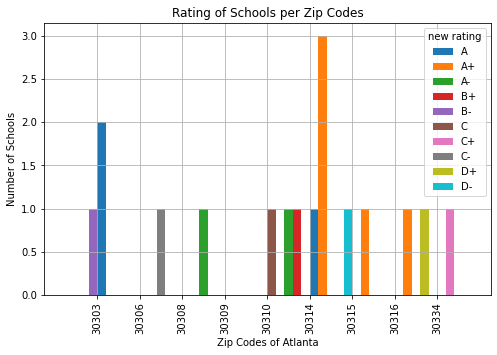

In [135]:
v_count = cleaned_zipcode_df.groupby(['zip'])['new rating'].value_counts()
count = cleaned_zipcode_df.groupby(['zip'])['new rating'].count()

labels= ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D-','n/a']
        
df_plot = (cleaned_zipcode_df.groupby(['zip'])['new rating'].value_counts()).unstack(1).plot(figsize=(8,5), grid=True,kind='bar',width = 2, legend=True)
plt.title("Rating of Schools per Zip Codes")
plt.xlabel('Zip Codes of Atlanta') 
plt.ylabel('Number of Schools')
plt.savefig('output-data/ratings_zip_schools.png')
#  .droplevel(0,axis=1)
#  .sort_index(1,ascending=False)
#  .plot(figsize=(8,5), grid=True,kind='bar',legend=False))


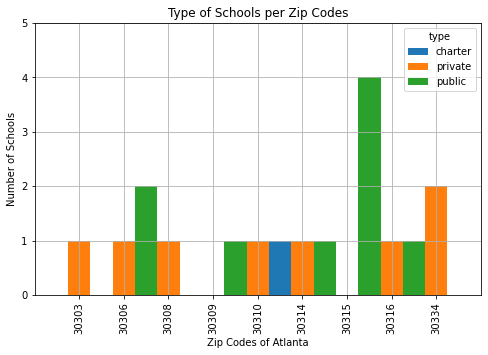

In [140]:
df_plot = (cleaned_zipcode_df.groupby(['zip'])['type'].value_counts()).unstack(1).plot(figsize=(8,5), grid=True,kind='bar',width = 1.5, legend=True)
plt.title("Type of Schools per Zip Codes")
plt.xlabel('Zip Codes of Atlanta') 
plt.ylabel('Number of Schools')
plt.ylim(0,5)
plt.savefig('output-data/type_zip_schools.png')


# calculate sum of values by group
df_zips = cleaned_zipcode_df.groupby(['zip'])['name'].count()
plt.figure(figsize=(12,8))

#create bar plot by group
df_zips.plot(kind='bar')
plt.xlabel('ZipCodes in Atlanta') 
plt.ylabel('Number of Schools per Zipcode') 
plt.ylim([0, 9])

# displaying the title
plt.title("Number of Public and Private High Schools per Zipcode")
plt.savefig('output-data/num_schools.png')

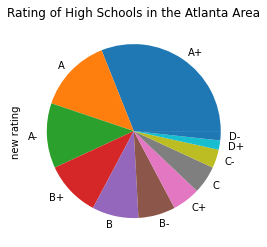

In [18]:
labels= ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D-','n/a']

cleaned_zipcode_df.sort_values('new rating', ascending=False)
cleaned_zipcode_df['new rating'].value_counts().plot(kind='pie',labels=labels)
plt.title("Rating of High Schools in the Atlanta Area")
plt.savefig("output-data/Ratings_of_schools.png")

plt.show()

In [40]:
df = cleaned_zipcode_df.dropna()
df.describe()

,zip,lat,lon
count,18.000000,18.000000,18.000000
mean,30313.888889,33.747633,-84.385233
std,8.407902,0.028079,0.033095
min,30303.000000,33.675117,-84.451271
25%,30308.250000,33.733166,-84.396873
50%,30314.000000,33.749733,-84.386391
75%,30315.000000,33.761865,-84.366835
max,30334.000000,33.790104,-84.313904


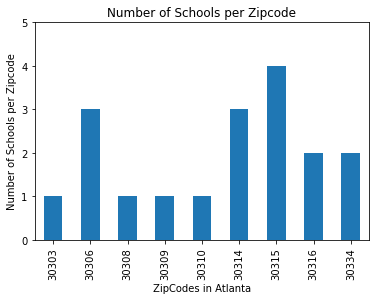

In [52]:


#calculate sum of values by group
df_zips = df.groupby(['zip'])['name'].count()

#create bar plot by group
df_zips.plot(kind='bar')
plt.xlabel('ZipCodes in Atlanta') 
plt.ylabel('Number of Schools per Zipcode') 
plt.ylim([0, 5])

# displaying the title
plt.title("Number of Schools per Zipcode")
plt.savefig('output-data/num_schools.png')

In [40]:
rating_range = cleaned_zipcode_df.copy()
#data_time_range["zipcode"]=z["zipcode"].unique()

rating_range.head()

,name,zip,type,level-codes,lat,lon,lat_lon,new rating
0,Graduation Achievement Center Charter High School,30303,charter,h,33.760502,-84.387169,"(33.760502, -84.387169)",NaN
1,Wellspring Living,30303,public,"m,h",33.754742,-84.385574,"(33.754742, -84.385574)",NaN
2,The Life School of Atlanta,30303,private,h,33.749504,-84.392090,"(33.749504, -84.39209)",B-
3,K12 International Academy,30334,private,"e,m,h",33.749733,-84.385696,"(33.749733, -84.385696)",C+
4,The Keystone School,30334,private,"m,h",33.749733,-84.385696,"(33.749733, -84.385696)",A+


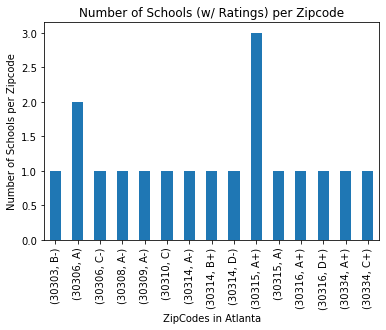

In [71]:
#calculate sum of values by group
df_zips = df.groupby(['zip'])['new rating'].value_counts()

#create bar plot by group
df_zips.plot(kind='bar')
plt.xlabel('ZipCodes in Atlanta') 
plt.ylabel('Number of Schools per Zipcode') 
plt.xlim  
# displaying the title
plt.title("Number of Schools (w/ Ratings) per Zipcode")
plt.savefig('output-data/ratings.png')

In [39]:
#!pip install folium

In [58]:
import folium
map = folium.Map(location=[33.675117, -84.451271], default_zoom_start=15)
map